In [110]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

# Assignment 1: Data Exploration

This is submission for Assignment 1 for student s3694551 - Bui Minh Triet 

<h1> Introduction </h1>
In this notebook, we are going to explore a dataset detailing a marketing campaign of a Portuguese banking institution. The included content contains numerous information regarding the the client (age, education,...), current and previous campaign (contact duration, number of contacts,....) and the current economic context (employment variation rate,....). The dataset will be imported, applied multiple methods to detect and elimiate potential errors (nan check, sanity check) and visualized to provide a deeper insight into the dataset itself. 
<h1> Task 1: Data Preparation </h1>
<h2> 1. Data Import </h2>

The following is the list of libraries that are used for this assignment

In [111]:
# import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [145]:
pd.set_option('display.max_colwidth', None)

The dataset is first imported into the Notebook file by using pandas' read_csv function. Since I used the provided csv version of the dataset, no delimiter need to specified in the function.

In [112]:
ORIGINAL_CSV_PATH = 'data/bank.csv'
CONVERT_CSV_PATH = 'data/df.csv'

In [113]:
# import data
df = pd.read_csv(ORIGINAL_CSV_PATH)

<b> Basic data description </b> </p>
We can see the dataset has total of 21 collumns and We have 4119 sample in this dataset.

In [114]:
# print out data
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


As required by the spec, we need to make sure the dataframe is equal to the original .csv file

In [115]:
# df.to_csv(CONVERT_CSV_PATH, index = False)  

In [116]:
# col_names = list(df.columns)

# with open(CONVERT_CSV_PATH) as csv_file:
#     with open(ORIGINAL_TXT_PATH) as txt_file:
#         csv_reader = csv.DictReader(csv_file)
#         text_reader = csv.DictReader(txt_file, delimiter="\t")

#         for csv_row, txt_row in zip(csv_reader, text_reader):
#             for i in col_names: 
#                 if csv_row[i] != txt_row[i]:
#                     if (isinstance(csv_row[i], float)) and (isinstance(txt_row[i], int)):
#                         print("once here:")
#                         if int(csv_row[i]) == int(txt_row[i]):
#                             print("once here:")
#                             continue
#                     print(csv_row[i])
#                     print(txt_row[i])

From the statistical analysis result on the numerical columns of the dataset, there are some observations that can be made:
- The "age" collumn has minimum value of 13 and maximum of 140, an interesting range. While the maximum age is quite high, it is not too unreasonable. However an age of 13 since it's quite a young age to have a bank account and deposit. Further inpection will be made in the Sanity Check part
- Minimum duration is 0, possibly an error, we would need to try and clean the data
- Standard deviation of collumns such as: duration and pdays is quite high, it is very possible that there are outliers in these collumns

In [117]:
# basic stats of the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4117.000000,4119.000000,4119.000000,4117.000000,4117.000000,4117.000000,4117.000000,4119.000000
mean,40.162661,256.838678,2.537284,960.422190,0.190337,0.085183,93.579449,-40.502308,3.620728,5166.481695
std,10.621359,254.745327,2.568759,191.922786,0.541788,1.563138,0.579190,4.593059,1.733778,73.667904
min,13.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,140.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Now we check the values type of each column (especially categorical collumns ). We can easily identify same typos exist "job", "education",...mismatch case in "housing",... three "na"  in "loan" and whitespace in "contact"

In [118]:
for i in df.columns:
    if(df[i].dtypes == object):
        print("\n")
        print("---- %s ---" % i)
        print(df[i].value_counts())



---- job ---
admin.           1012
blue-collar       883
technician        691
services          392
management        324
retired           166
self-employed     159
entrepreneur      147
unemployed        111
housemaid         110
student            82
unknown            39
entrepreneurs       1
bluecollar          1
servicess           1
Name: job, dtype: int64


---- marital ---
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64


---- education ---
university.degree      1264
high.school             921
basic.9y                572
professional.course     535
basic.4y                425
basic.6y                223
unknown                 167
basic .6y                 4
basic0.4y                 2
basic .4y                 2
basic .9y                 2
basic0.6y                 1
illiterate                1
Name: education, dtype: int64


---- default ---
no         3315
unknown     803
yes           1
Name: default, dtype: int64


----

<h2> 2. Detect na and null values </h2> </p>

In order to detect na and null values, we use an in built function to sum all nan cells according to its collumns

In [119]:
# check na
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           2
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          2
pdays             0
previous          0
poutcome          0
emp.var.rate      2
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       0
y                 0
dtype: int64

We detect 15 rows where there are nan value existing. These rows are shown below

In [120]:
#Print na rows
df[df.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
12,36,admin.,married,high.school,no,no,no,telephone,may,wed,...,2.0,999,0,nonexistent,1.1,93.994,NaN,4.859,5191.0,no
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2.0,999,0,nonexistent,1.4,93.444,-36.1,NaN,5228.1,no
27,28,blue-collar,married,basic.6y,unknown,NaN,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
34,48,technician,married,university.degree,no,no,no,cellular,aug,thu,...,7.0,999,0,nonexistent,1.4,NaN,-36.1,4.962,5228.1,no
54,33,admin.,single,university.degree,no,yes,no,cellular,may,thu,...,1.0,999,0,nonexistent,NaN,92.893,-46.2,1.327,5099.1,no
82,59,services,married,basic.4y,unknown,no,no,cellular,aug,thu,...,7.0,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
138,37,technician,divorced,professional.course,no,no,no,telephone,may,wed,...,1.0,999,0,nonexistent,NaN,93.994,-36.4,4.856,5191.0,no
140,54,technician,divorced,professional.course,no,NaN,yes,cellular,jul,tue,...,14.0,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
143,28,technician,single,professional.course,no,yes,no,cellular,aug,thu,...,2.0,3,1,success,-2.9,92.201,NaN,0.851,5076.2,yes
147,40,technician,married,basic.9y,unknown,no,yes,telephone,may,thu,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no


<h2> 3. Resolving Typos and Whitespace </h2>

We first handle the typos by extracting the rows conditionally which match the typo we saw earlier. Then the correct value is replaced in the typo place. value_counts() are then used to show the categorical value after fixing the error.

In [121]:
#resolving typos in job
df.loc[df["job"] == "admin.", "job"] = "admin"
df.loc[df["job"] == "bluecollar", "job"] = "blue-collar"
df.loc[df["job"] == "entrepreneurs", "job"] = "entrepreneur"
df.loc[df["job"] == "servicess", "job"] = "services"
df["job"].value_counts()

admin            1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [122]:
#resolving typos in education
df.loc[(df["education"] == "basic0.6y") | (df["education"] == "basic .6y"), "education"] = "basic.6y"
df.loc[(df["education"] == "basic0.4y") | (df["education"] == "basic .4y"), "education"] = "basic.4y"
df.loc[(df["education"] == "basic .9y"), "education"] = "basic.9y"
df["education"].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

Here we encounter a particular case of in the "loan" collumn where three cell has "na" value. It could be argue that this merely a mistake in inserting "no" as the value. There's a possibility that this is a NaN value inserted on a categorical collumn. Thanksfully, the column is describe to acquire an "unknown" value type which is very fitting in his case. For this reason, I will reassign the 3 "na" with "unknown"

In [123]:
df["loan"].value_counts()

no         3346
yes         665
unknown     105
na            3
Name: loan, dtype: int64

In [124]:
df.loc[(df["loan"] == "na")]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1089,48,admin,divorced,high.school,no,no,na,telephone,jul,mon,...,2.0,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
1090,32,blue-collar,married,basic.6y,no,yes,na,telephone,jun,fri,...,6.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
1091,35,blue-collar,married,basic.6y,no,no,na,telephone,may,wed,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
#resolving typos in loan
df.loc[(df["loan"] == "na"), "loan"] = "unknown"
df["loan"].value_counts()

no         3346
yes         665
unknown     108
Name: loan, dtype: int64

Additionally, we detected a similar case in the next collumn "housing" where along side with mismattch case, one call has "na" as the value. We then handle them accordingly

In [126]:
df["housing"].value_counts()

yes        2172
no         1835
unknown     105
Yes           2
No            2
na            1
Name: housing, dtype: int64

In [127]:
#resolving typos in housing
df.loc[(df["housing"] == "Yes"), "housing"] = "yes"
df.loc[(df["housing"] == "No"), "housing"] = "no"
df.loc[(df["housing"] == "na"), "housing"] = "unknown"
df["housing"].value_counts()

yes        2174
no         1837
unknown     106
Name: housing, dtype: int64

In [128]:
df["housing"].value_counts()

yes        2174
no         1837
unknown     106
Name: housing, dtype: int64

From the above na/null check, we know that "housing" also harbours two NaN which did not shown in value_counts(). A sensible way for this task would be to remove them. Thanksfully, the column is describe to acquire an "unknown" value type which is very fitting in his case. For this reason, I will reassign the NaN with "unknown" to keep valuable information

In [129]:
df["housing"].fillna('unknown', inplace = True)

We can see "housing" is now NaN free

In [130]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          2
pdays             0
previous          0
poutcome          0
emp.var.rate      2
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       0
y                 0
dtype: int64

For whitespace error, we use a strip() function to most optimal cleanup

In [131]:
df['contact'] = df['contact'].str.strip()

In [132]:
df["contact"].value_counts()

cellular     2652
telephone    1467
Name: contact, dtype: int64

In [133]:
df.loc[(df["day_of_week"] == "Monday"), "day_of_week"] = "mon"
df.loc[(df["day_of_week"] == "Friday"), "day_of_week"] = "fri"

In [134]:
df["day_of_week"].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

In [135]:
df['poutcome'] = df['poutcome'].str.strip()

In [136]:
df["poutcome"].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

<h2> 4. Sanity check </h2>

The first sanity check is to ensure the age range is in a range where the value would make sense. For this assignment, I will apply a "rule-of-thumb" range of [0-100] first to filter out cases where the age is greater than 100 (which could possibly be wrong) and false value less than 0. I also apply an additional check to see if there's any customer is NOT of age to create a bank account and deposit in Portugal. According to [], the minimum age is 18 so the next range of checking is from 0 to 18

In [137]:
df[(df['age'] > 100) | ((df['age'] < 0))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1499,140,admin,married,high.school,unknown,yes,no,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
1500,138,admin,married,university.degree,no,yes,no,telephone,jun,thu,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no


I manages to find three cases where customer has age lower than 18. Additional information indidcates they are married, has jobs, two out of three acquires university degrees which lead me to believe that their age is false

In [141]:
df[(df['age'] < 18)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
99,16,admin,married,unknown,no,no,no,cellular,aug,tue,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
100,13,management,married,university.degree,unknown,no,yes,cellular,apr,fri,...,1.0,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


In order to remedy this error, I find the average age for clients with similar job - marital - education status by using median() function over extracted age and assigned them to the appropriate row. For client with job in "management", marital status as "married" and has education as "university.degree", the median age is 42. We then change the row 98 and 100 with 42.0 for age

In [95]:
df.loc[(df["job"] == "management") & (df["marital"] == "married") & (df["education"] == 'university.degree'), "age"].median()

42.0

In [142]:
df.iloc[98,0] = 42.0
df.iloc[100,0] = 42.0

And for client with job as 'admin" and marital status as "married", the median is 39. We will then change the age value for row 99 with 39

In [108]:
df.loc[(df["job"] == "admin") & (df["marital"] == "married"), "age"].median()

39.0

In [143]:
df.iloc[99,0] = 39.0

From earlier observation, we detected a 0 duration row where it's highly an error since there has been 4 contacts for this campaign

In [149]:
pd.set_option('display.max_columns', None)
df[df['duration'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1950,39,admin,married,high.school,no,yes,no,telephone,may,tue,0.0,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


I went an extra mile and check for any cases for pdays equals to 999 meaning the client was not contact during the last campaign but has an previous outcome as success which would be impossible. thanksfully, none match the case

In [157]:
df[(df['pdays'] == 999) & (df['poutcome'] == "success")]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


After finishing the sanity check, we then drop the remaining NaN rows

In [31]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [32]:
df_with_na = df.copy()
df = df.dropna()

In [33]:
df_with_na

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


<h2> 5. Outliers detection </h2>

Before we can draw box plots and histograms for the dataframe, I created a copy of of the dataframe and apply Label Encoder onto the categorical columns so it can be graphed by matplotlib. Since the data is only used to visualized, the usual drawback of Label Encoding, falsely ranking of category, won't be an issue.

In [34]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [35]:
le = LabelEncoder()

In [36]:
df_num = df.copy()

In [37]:
df_num['job'] = le.fit_transform(df.job.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'admin': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}


In [38]:
df_num['marital'] = le.fit_transform(df.marital.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}


In [39]:
df_num['education'] = le.fit_transform(df.education.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}


In [40]:
df_num['default'] = le.fit_transform(df.default.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'no': 0, 'unknown': 1, 'yes': 2}


In [41]:
df_num['housing'] = le.fit_transform(df.housing.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'no': 0, 'unknown': 1, 'yes': 2}


In [42]:
df_num['loan'] = le.fit_transform(df.loan.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'na': 0, 'no': 1, 'unknown': 2, 'yes': 3}


In [43]:
df_num['contact'] = le.fit_transform(df.contact.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'cellular': 0, 'telephone': 1}


In [44]:
df_num['month'] = le.fit_transform(df.month.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}


In [45]:
df_num['poutcome'] = le.fit_transform(df.poutcome.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'failure': 0, 'nonexistent': 1, 'success': 2}


In [46]:
df_num['y'] = le.fit_transform(df.y.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'no': 0, 'yes': 1}


Following is the visualisation of all collumns. From the box plots, we can see presence of outliers

<Figure size 432x288 with 0 Axes>

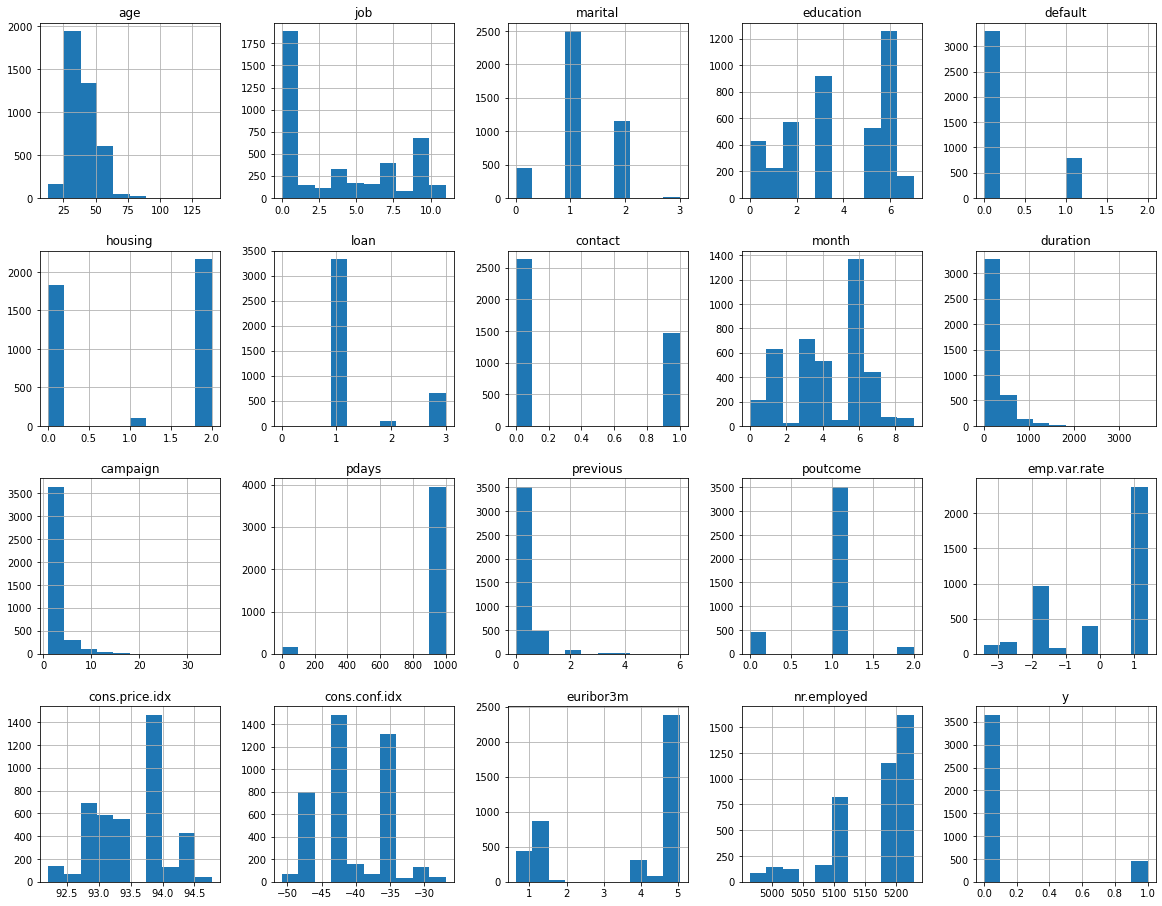

In [49]:
plt.figure()
df_num.hist(figsize=(20,20), layout=(5,5))
plt.show()

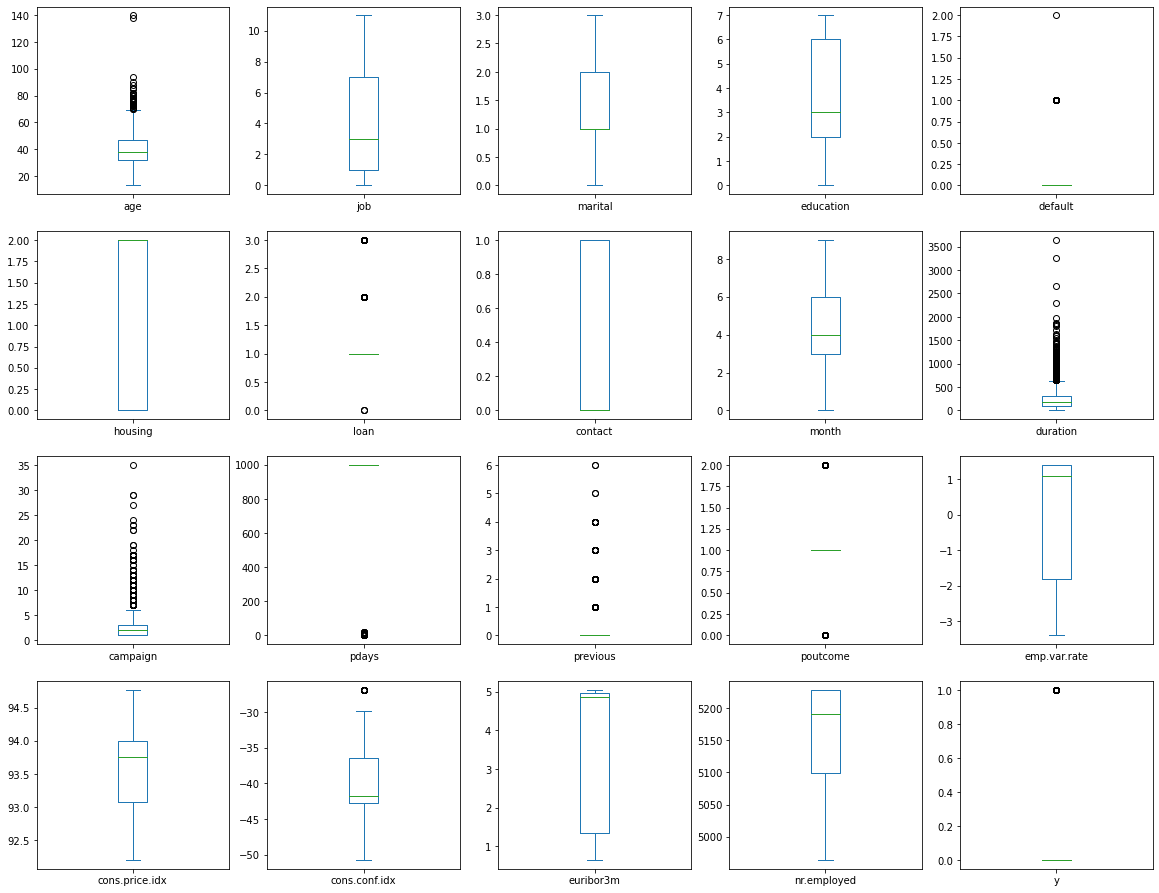

In [50]:
df_num.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize =(20,20))
plt.show()

<h2> 6. Intuition </h2>
1. Most of the data was in May, there might be a market surge in this time which leads to a increase in loan application.

<h1> Task 2. Data Exploration </h1>

<h2> 1. Singular collumns visualization </h2>

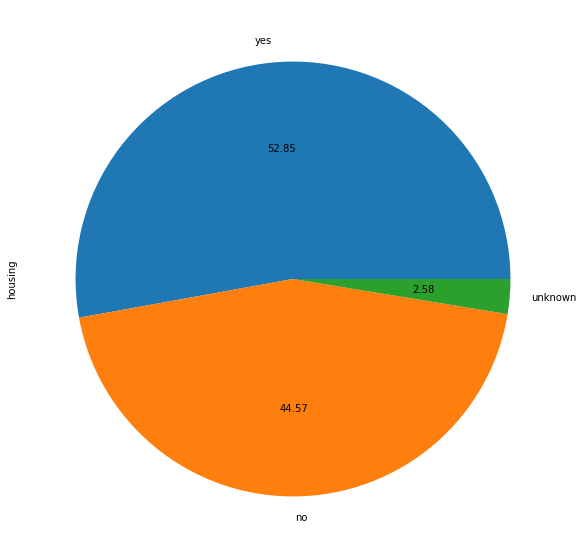

In [51]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values
df['housing'].value_counts().plot(kind='pie',autopct='%.2f',figsize =(10,10)) 
plt.show()
#Code goes after this line

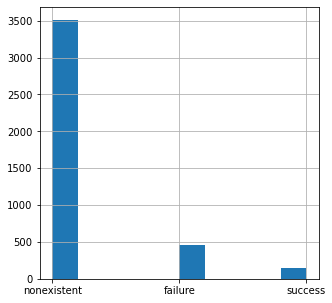

In [52]:
plt.figure()
df['poutcome'].hist(figsize=(5,5))
plt.xticks(range(3))
plt.show()

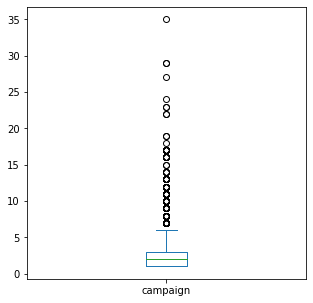

In [53]:
df['campaign'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize =(5,5))
plt.show()

<h2> 2. Explore the relationships between columns </h2>

In [54]:
df_1 = df.groupby(['job', 'marital'])['campaign'].sum()
df_1 = df_1.unstack().fillna(0)

<AxesSubplot:xlabel='job'>

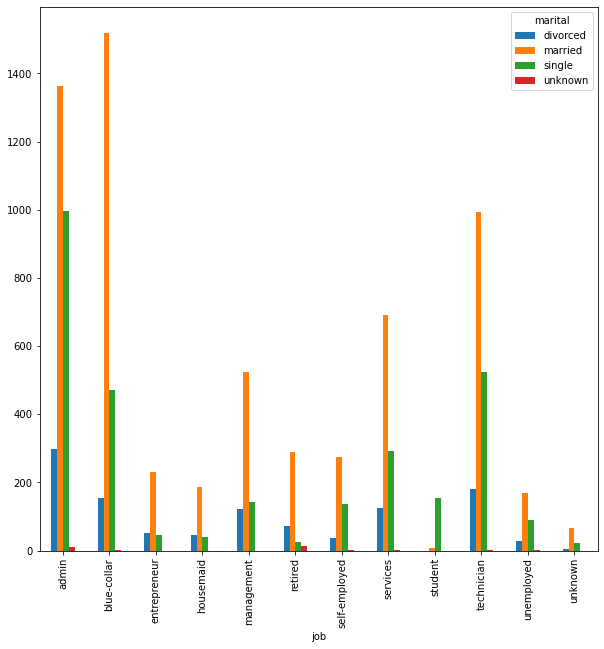

In [55]:
df_1.plot.bar(figsize= (10,10))

/tmp/ipykernel_117/4055174741.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2 = df.groupby('job')['campaign','previous'].sum()


<AxesSubplot:xlabel='job'>

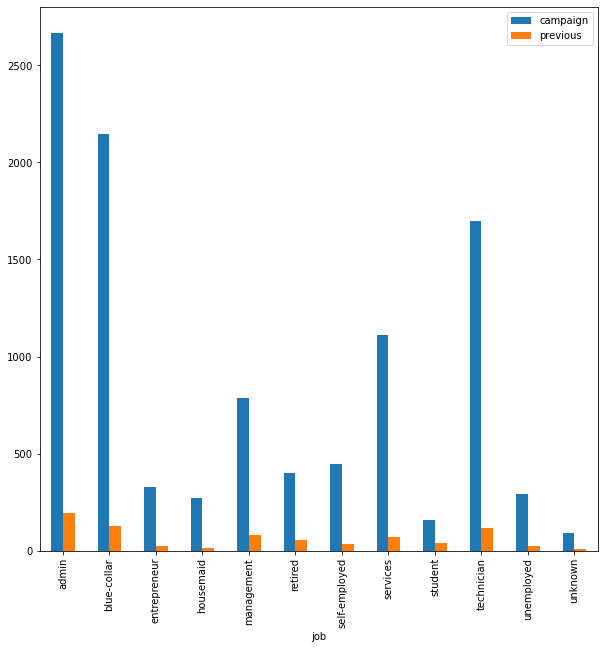

In [56]:
df_2 = df.groupby('job')['campaign','previous'].sum()
df_2.plot.bar(figsize= (10,10))

<AxesSubplot:xlabel='emp.var.rate', ylabel='nr.employed'>

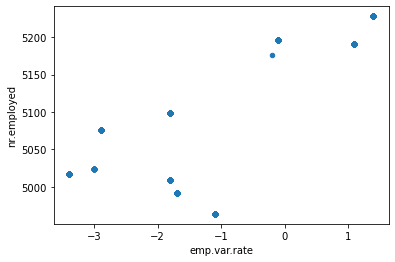

In [57]:
df.plot.scatter(x='emp.var.rate',y='nr.employed')

<h2>3. Build a scatter matrix </h2>

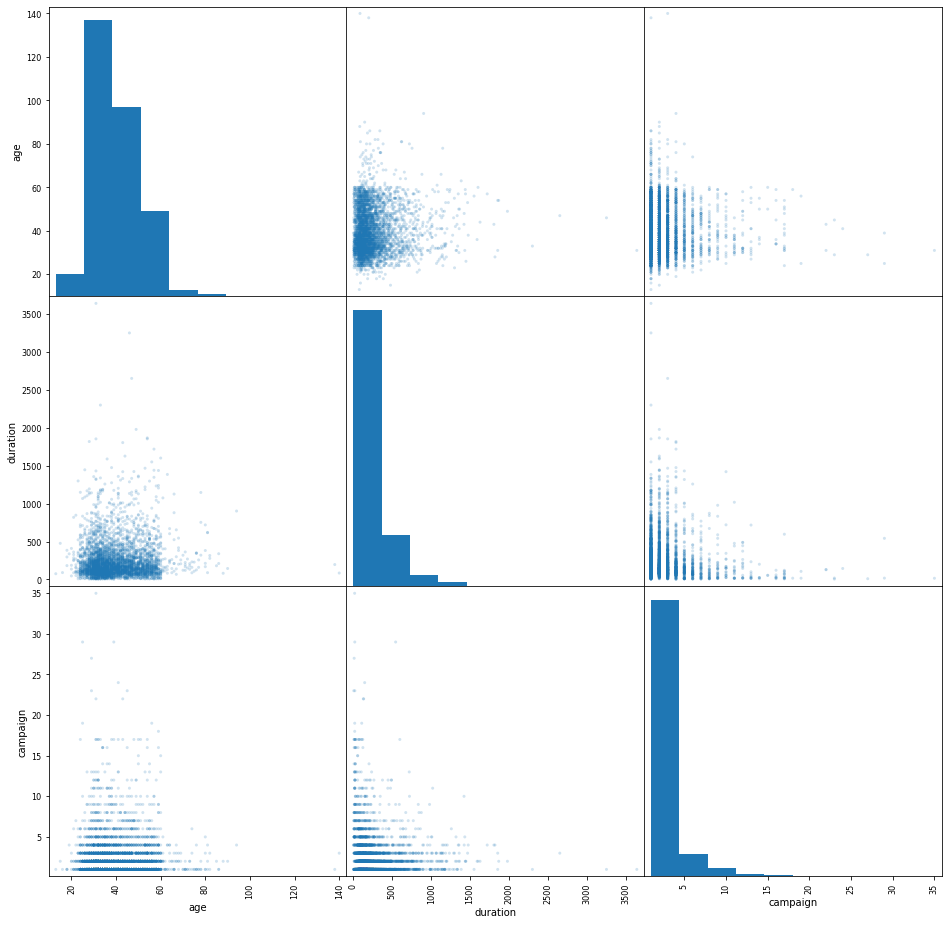

In [58]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df.loc[:,['age', 'duration', 'campaign']],alpha=0.2,figsize=(16,16),diagonal='hist') 
plt.show() 

<h1> Task 3. Dealing with Missing Values and Outliers </h1>

In [59]:
# Task 2: Analysis
# 3. Scatter matrix for all numerical columns

#Code goes after this line

In [60]:
df_with_na[df_with_na.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
12,36,admin,married,high.school,no,no,no,telephone,may,wed,...,2.0,999,0,nonexistent,1.1,93.994,NaN,4.859,5191.0,no
18,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,2.0,999,0,nonexistent,1.4,93.444,-36.1,NaN,5228.1,no
27,28,blue-collar,married,basic.6y,unknown,NaN,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
34,48,technician,married,university.degree,no,no,no,cellular,aug,thu,...,7.0,999,0,nonexistent,1.4,NaN,-36.1,4.962,5228.1,no
54,33,admin,single,university.degree,no,yes,no,cellular,may,thu,...,1.0,999,0,nonexistent,NaN,92.893,-46.2,1.327,5099.1,no
82,59,services,married,basic.4y,unknown,no,no,cellular,aug,thu,...,7.0,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
138,37,technician,divorced,professional.course,no,no,no,telephone,may,wed,...,1.0,999,0,nonexistent,NaN,93.994,-36.4,4.856,5191.0,no
140,54,technician,divorced,professional.course,no,NaN,yes,cellular,jul,tue,...,14.0,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
143,28,technician,single,professional.course,no,yes,no,cellular,aug,thu,...,2.0,3,1,success,-2.9,92.201,NaN,0.851,5076.2,yes
147,40,technician,married,basic.9y,unknown,no,yes,telephone,may,thu,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no


In [61]:
df_with_na['housing'].value_counts()

yes        2174
no         1837
unknown     106
Name: housing, dtype: int64

<h2>Replacing  with the column-wise mean value </h2>

In [62]:
df_mean = df_with_na.copy()

In [63]:
df_mean = df_mean.fillna(df_mean.mean())

/tmp/ipykernel_117/2013598011.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = df_mean.fillna(df_mean.mean())


In [64]:
df_mean['housing'].fillna('unknown', inplace = True)

In [65]:
df_mean[df_mean.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [66]:
df_mean.to_csv("data/bank_fix1.csv", index = False)  

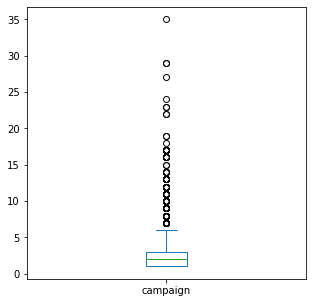

In [67]:
df_mean['campaign'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize =(5,5))
plt.show()

<h2>Replacing  with the column-wise median value </h2>

In [68]:
df_median = df_with_na.copy()

In [69]:
df_median = df_median.fillna(df_median.median())

/tmp/ipykernel_117/3022522306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median = df_median.fillna(df_median.median())


In [70]:
df_median['housing'].fillna('unknown', inplace = True)

In [71]:
df_median[df_median.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [72]:
df_median.to_csv("data/bank_fix2.csv", index = False)  

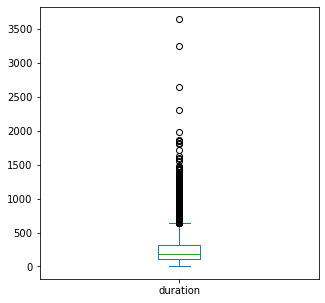

In [73]:
df_median['duration'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize =(5,5))
plt.show()

<h2> Questions and Answers</h2>

<h3> Do outliers affect standard deviation? </h3>

Yes, outliers can affect standard deviation. Standard Deviation is to illustrate the average distance of each value from the means. A datapoint that is either too high or to low could increase the standard deviation and creating an impression that the data has wide variability. 

<h3>When should an outlier not be removed? </h3>

In the Data Science field, outlier is a common occurence in most projects. Even though their existence could affect statistical analysis and morph one's assumption of the dataset, outliers still pose an important role since they represent a natural occurence in the context of the dataset and possess valuable information regarding the sampling method. Outliers could occur in three scenarios:

1. Data Entry Error and Measurement Error (https://statisticsbyjim.com/basics/remove-outliers/): This is cases where in the context of the dataset (and the column), the data so great of a distance that it would be impossible for such scenario to occur. For example, a customer having a value of 1000 in the "age" collumn or 10 in a hypothetical meter-based "height" column. In this case, it is acceptable to remove the outlier so as not to skew the statistical result. To know which datapoint is outside the boundaries of reasons, one must acquire extensive knowledge regard the domain knowledge. 

2. Sampling error: It is also noted that a mistake might have happen where a datapoint does not belong to the current target population but got included due to unaccounted / unusual factors  in the process of procuring of data. An example of such scenario would be: A study into the treatment documents for Tetanus patients, during analysis of the occurence and orderding of sequence elements in the medical forms wrtitten by 5 doctos, one record has unusual amount and combination of elements. Upon closer inspection, we realize that the record has different syntax to portrait patient's health progression, symptomps that does not belong to Tetanus disease and handwriting that does not match any of the ones on "correct" record. Validation from experts at the medical clinic show that the outlier record's content portrait a Dengue case but use a form similar to the Tetanus set which confuse the document retrival tool. In such case, we can make exclude such document since it is not a part of the target population (scope)

3. Outlier due to natural cause: Even though a dataset might be 100% correct in term of no Data Entry, Measurement or Sampling errors, outliers could still exist due to natural variability especially in large sample sizes. The referenced articled mentioned a study into the Presidental Election as an example where natural outliers still happen due to the potention surprises and unpreditability of a country's political atmosphere. In such cases, it is reccomended to keep the outliers for a truthfull representation. In such case, my personal preference to hinder the negative effetc of outliers is to apply Normalization/ Standardization on the data.

<h3> Consider the numeric columns in the bank.csv data, are there outliers in these
columns of the data set? How do you detect them? </h3>

It can be observed by using the histograms and the boxplots in order to recognize the occurence. Take "duration" for example, where most data stay in the rang from 0 to 500 but then there's datapoint that could exist up to 3500 (s) meaning the duration is around 1 hour. Whilst the value is high but still within the range of reason since a customer might have a lot of questions or feedbacks. Similar scenarios can be detected in collumns such as: 

- age
- duration
- campaign
- p days
- cons.conf.idx

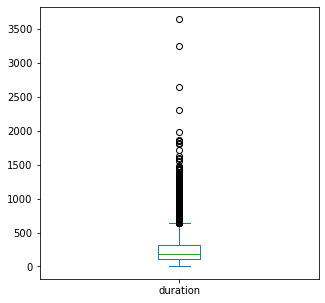

In [74]:
df['duration'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize =(5,5))
plt.show()

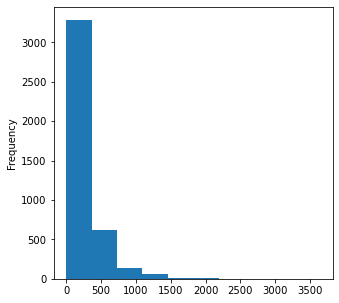

In [75]:
df['duration'].plot(kind='hist', subplots=True, sharex=False, sharey=False, figsize =(5,5))
plt.show()

Possible methods of detecting outliers:

- Using Interuarile Range/Boxplot: The method that I used the most is creating a Interquartile Range to have a visualiztion of where data most located along with indications of possiblie outliers. To do this, creating a box plot is s the most intuitive and require least time, user can quicly detect any whiskers in the graph for outliers presence
- Applying standard deviation formula on a column: A different method is to calculate the standard deviation via its formula: 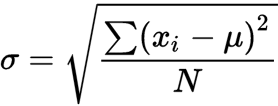. Since standard deviation illustrated the variability of the dataset. According to [](https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/), a normal distribution will have 68.2% one std from the mean while 95.4% and 99.7% of the data exist within two and three standard deviations. We can set the lower limit to three standard deviations below the mean (std - 3*mean) and higher limit to three standard deviations above the mean (std + 3*mean). Datapoint outside this range is outliers
- Sorting method: An easy to implement method is sort the numerical value from low to high to manually scan and check. Of course, this method is not recommended in most cases (especially where the dataset is large) due to the manual manner of the task.
